In [13]:
#Imported important librabies for analysis
from sklearn.utils import resample
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report , confusion_matrix, accuracy_score
% matplotlib inline

In [3]:
#Reading the training file
# New training file is used which is made after class imbalance problem solving
# class imbalance is solved using Random Over-Sampling of minority class that is class=1
train = pd.read_csv("train.csv")
train.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Faults
0,24,38,2563219,2563241,173,22,23,17100,85,111,...,0.6364,0.9565,1.0,2.2380,1.1461,1.3424,0.3636,-0.2278,0.5096,0
1,35,75,2412964,2412966,65,40,3,8355,85,165,...,1.0000,0.6667,0.0,1.8129,1.6021,0.3010,-0.9500,0.0042,0.1852,0
2,165,176,1293999,1294012,106,11,13,11973,96,128,...,1.0000,1.0000,1.0,2.0253,1.0414,1.1139,0.1539,-0.1176,0.2570,1
3,19,57,103914,103916,54,38,2,7498,101,180,...,1.0000,1.0000,0.0,1.7324,1.5798,0.3010,-0.9474,0.0848,0.1812,0
4,41,216,1555596,1555663,6562,255,125,677554,36,125,...,0.6863,0.5360,0.0,3.8170,2.2430,1.8261,-0.6171,-0.1933,1.0000,0


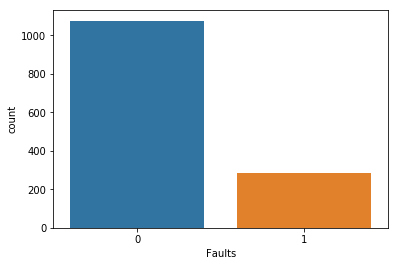

In [4]:
sns.countplot(x="Faults", data= train)

### Since the dataset is sparse and the error varies extremely i.e faults is 1 for 283 and no-fault is 0 for 1075 in train dataframe, it is better to try to get a better accuracy after stratifying the trainning dataset sample and checking the best performance

## Up-sample Minority Class

In [5]:
# Separate majority and minority classes
df_majority = train[train.Faults==0]
df_minority = train[train.Faults==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=1075,    # to match majority class
                                 random_state=2) # reproducible results
 
# Combine majority class with upsampled minority class
train = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
train.Faults.value_counts()
# 1    576
# 0    576
# Name: balance, dtype: int64

1    1075
0    1075
Name: Faults, dtype: int64

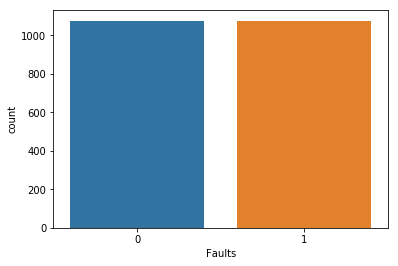

In [6]:
sns.countplot(x="Faults", data= train)

In [7]:
# redundant class is "Type of steel A_400" its negative is A_300
train.drop("TypeOfSteel_A400", axis=1, inplace=True)

In [8]:
# looking at each feature details
train.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Faults
count,2150.000000,2150.000000,2.150000e+03,2.150000e+03,2150.000000,2150.000000,2150.000000,2.150000e+03,2150.000000,2150.000000,...,2150.000000,2150.000000,2150.000000,2150.000000,2150.000000,2150.000000,2150.000000,2150.000000,2150.000000,2150.000000
mean,675.326977,710.172558,1.816797e+06,1.816841e+06,1281.983256,81.064186,63.172558,1.387547e+05,86.507907,129.115349,...,0.641438,0.860852,0.622791,2.355365,1.255468,1.333236,0.109773,-0.140704,0.523906,0.500000
std,512.135862,494.077647,1.772472e+06,1.772482e+06,4565.892012,273.477740,402.447298,4.391917e+05,27.986779,15.990973,...,0.225171,0.208631,0.469935,0.678691,0.409434,0.399354,0.444181,0.132930,0.317755,0.500116
min,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,...,0.014400,0.105000,0.000000,0.301000,0.301000,0.000000,-0.973900,-0.998900,0.119000,0.000000
25%,137.250000,213.000000,5.829452e+05,5.830842e+05,83.000000,14.000000,13.000000,9.248500e+03,75.000000,124.000000,...,0.500000,0.787900,0.000000,1.919100,1.000000,1.079200,-0.166700,-0.201900,0.243200,0.000000
50%,681.000000,713.000000,1.347971e+06,1.347995e+06,141.500000,21.000000,19.500000,1.573800e+04,90.000000,127.000000,...,0.666700,1.000000,1.000000,2.150750,1.113900,1.255300,0.117700,-0.144500,0.413800,0.500000
75%,1097.000000,1124.000000,2.531688e+06,2.531711e+06,349.750000,46.000000,41.750000,3.716675e+04,104.000000,135.000000,...,0.800000,1.000000,1.000000,2.543775,1.380200,1.531500,0.454500,-0.082350,0.892050,1.000000
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,...,1.000000,1.000000,1.000000,5.183700,3.074100,4.258700,0.991700,0.642100,1.000000,1.000000


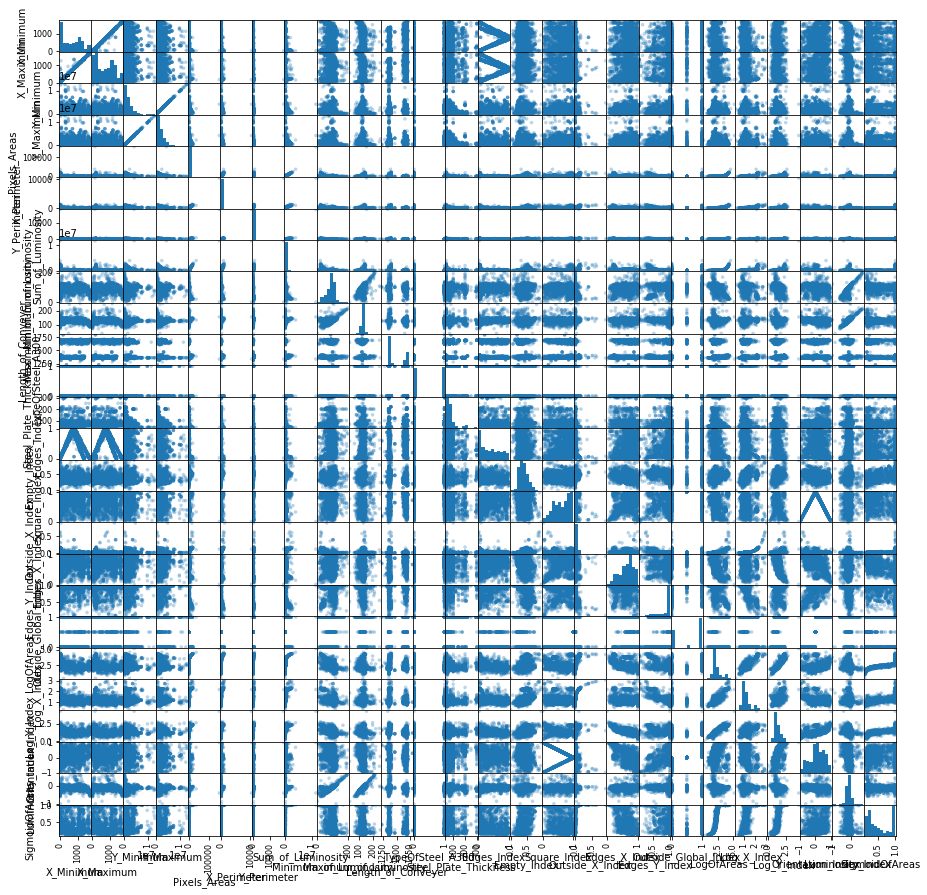

In [9]:
#plotting the scatter plot for each combination of features
pd.plotting.scatter_matrix(train.loc[:, train.columns != 'Faults'], figsize= [15,15], diagonal= 'hist', alpha= 0.3, s=50 )
plt.show()

In [10]:
#looking at the correlation matrix of features
train.corr()
#no correlation is found here

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Faults
X_Minimum,1.000000,0.991353,0.068767,0.068753,-0.274447,-0.230667,-0.109079,-0.310170,0.183321,-0.152911,...,0.135226,0.335201,0.117176,-0.405461,-0.412360,-0.306549,0.155161,-0.104155,-0.335620,0.296283
X_Maximum,0.991353,1.000000,0.072560,0.072548,-0.206926,-0.171132,-0.085086,-0.232329,0.131247,-0.144813,...,0.124953,0.254649,0.081773,-0.324126,-0.316014,-0.253392,0.106086,-0.108201,-0.279294,0.271489
Y_Minimum,0.068767,0.072560,1.000000,1.000000,-0.000619,0.007498,0.018540,-0.011452,-0.037054,-0.075654,...,0.046856,0.007187,-0.008507,0.015372,0.026370,-0.009188,-0.034352,-0.090320,0.006009,0.156940
Y_Maximum,0.068753,0.072548,1.000000,1.000000,-0.000448,0.007690,0.018759,-0.011311,-0.037082,-0.075643,...,0.046826,0.007181,-0.008500,0.015413,0.026395,-0.009129,-0.034336,-0.090331,0.006034,0.156926
Pixels_Areas,-0.274447,-0.206926,-0.000619,-0.000448,1.000000,0.970484,0.852670,0.978169,-0.436188,0.112674,...,-0.282286,-0.419916,-0.081608,0.613560,0.565373,0.557291,-0.100962,-0.028981,0.385198,-0.229019
X_Perimeter,-0.230667,-0.171132,0.007498,0.007690,0.970484,1.000000,0.926914,0.916717,-0.345046,0.111787,...,-0.278660,-0.373533,-0.062238,0.529501,0.491126,0.503669,-0.074329,-0.018936,0.346335,-0.196400
Y_Perimeter,-0.109079,-0.085086,0.018540,0.018759,0.852670,0.926914,1.000000,0.734014,-0.190634,0.066396,...,-0.181322,-0.124978,0.012194,0.283694,0.219482,0.336864,0.037504,-0.041994,0.176914,-0.099689
Sum_of_Luminosity,-0.310170,-0.232329,-0.011452,-0.011311,0.978169,0.916717,0.734014,1.000000,-0.482753,0.138936,...,-0.317705,-0.494875,-0.094195,0.685758,0.641503,0.604523,-0.124493,0.001103,0.432955,-0.258055
Minimum_of_Luminosity,0.183321,0.131247,-0.037054,-0.037082,-0.436188,-0.345046,-0.190634,-0.482753,1.000000,0.443564,...,0.192078,0.219783,-0.017676,-0.618902,-0.496470,-0.534699,0.006098,0.698280,-0.446833,0.099505
Maximum_of_Luminosity,-0.152911,-0.144813,-0.075654,-0.075643,0.112674,0.111787,0.066396,0.138936,0.443564,1.000000,...,0.050772,-0.196832,-0.128518,0.033389,0.119565,-0.037505,-0.180359,0.862282,0.000163,-0.092050


## K Neighbors Classifier with train:test = 70:30 percent with random shuffle and Y variable Stratified

This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's

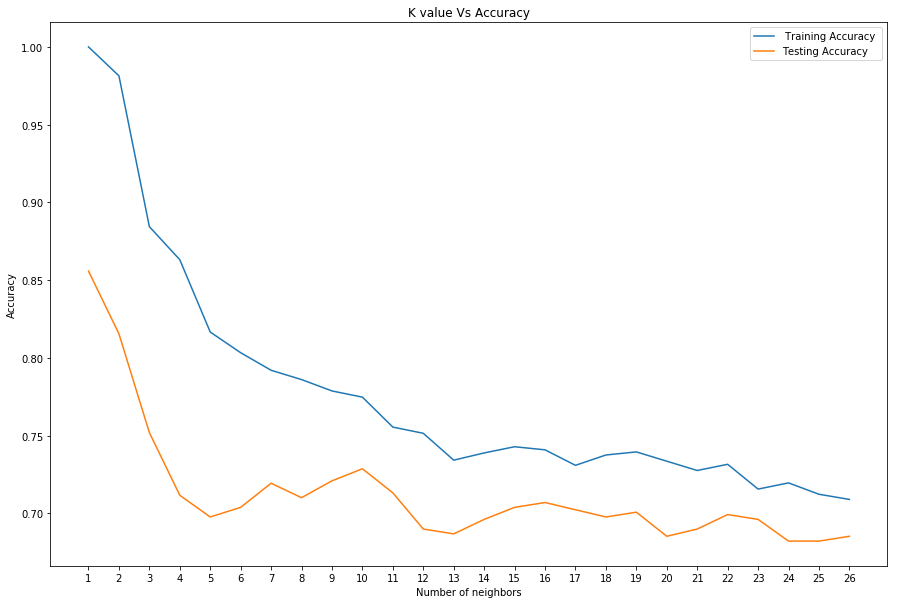

Best accuracy is 0.8558139534883721 with K = 1


In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
x,y = train.loc[:, train.columns != "Faults"], train['Faults']
x_train,x_test, y_train, y_test = train_test_split(x, y,stratify= y, test_size=0.3, random_state= 2, shuffle= True)
train_accuracy = []
test_accuracy = []

for k in range(1,27):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    train_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test, y_test))
    
plt.figure(figsize= [15,10])
plt.plot(range(1,27), train_accuracy, label= " Training Accuracy ")
plt.plot(range(1,27), test_accuracy, label= "Testing Accuracy")
plt.legend()
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.title("K value Vs Accuracy")
plt.xticks(range(1,27))
plt.show()

print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

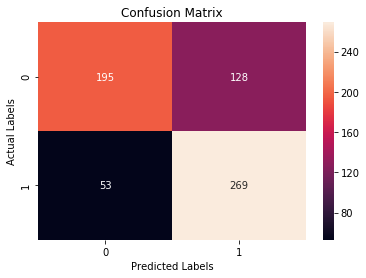

Classification Report : 
              precision    recall  f1-score   support

          0       0.79      0.60      0.68       323
          1       0.68      0.84      0.75       322

avg / total       0.73      0.72      0.72       645



In [14]:
knn = KNeighborsClassifier(n_neighbors=7)
y_pred= knn.fit(x_train, y_train).predict(x_test)
cm= confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt= "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()
print("Classification Report : \n", classification_report(y_test, y_pred))

## Random Forest Classifier 

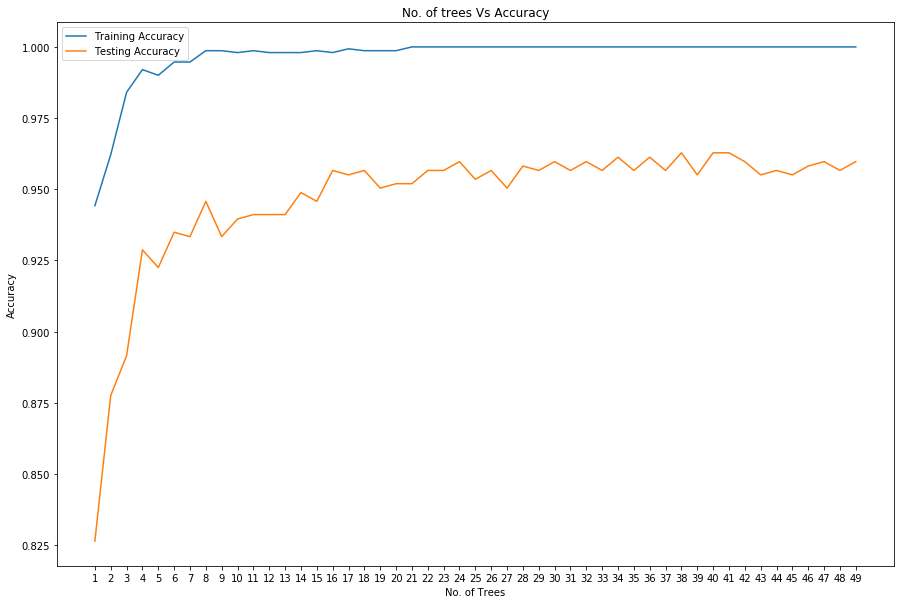

Best Accuracy is 0.9627906976744186 with No. of Trees 38


In [15]:
from sklearn.ensemble import RandomForestClassifier

x_train, x_test, y_train, y_test = train_test_split(x, y,stratify= y, test_size= 0.3, random_state= 2, shuffle= True)
train_accuracy= []
test_accuracy= []

for t in range(1, 50):
    rf= RandomForestClassifier(random_state =2, n_estimators= t, min_samples_split= 2)
    rf.fit(x_train, y_train)
    train_accuracy.append(rf.score(x_train, y_train))
    test_accuracy.append(rf.score(x_test, y_test))
    
plt.figure(figsize= [15,10])
plt.plot(range(1, 50), train_accuracy, label= "Training Accuracy")
plt.plot(range(1,50), test_accuracy, label= "Testing Accuracy")
plt.legend()
plt.title("No. of trees Vs Accuracy")
plt.xlabel("No. of Trees")
plt.ylabel("Accuracy")
plt.xticks(range(1,50))
plt.show()

print("Best Accuracy is {} with No. of Trees {}".format(np.max(test_accuracy), 1+ test_accuracy.index(np.max(test_accuracy))))

### Confusion Matrix for best performance model of Random Forest

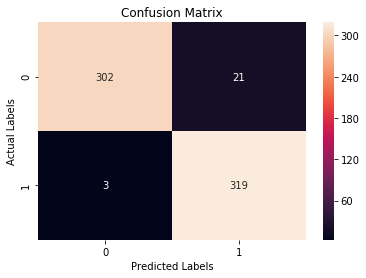

Classification Report : 
              precision    recall  f1-score   support

          0       0.99      0.93      0.96       323
          1       0.94      0.99      0.96       322

avg / total       0.96      0.96      0.96       645



In [16]:
rf= RandomForestClassifier(random_state= 2, n_estimators= 38, min_samples_split=2)
y_pred= rf.fit(x_train, y_train).predict(x_test)
cm= confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt= "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()
print("Classification Report : \n", classification_report(y_test, y_pred))

## Decision Tree with Boosting is used

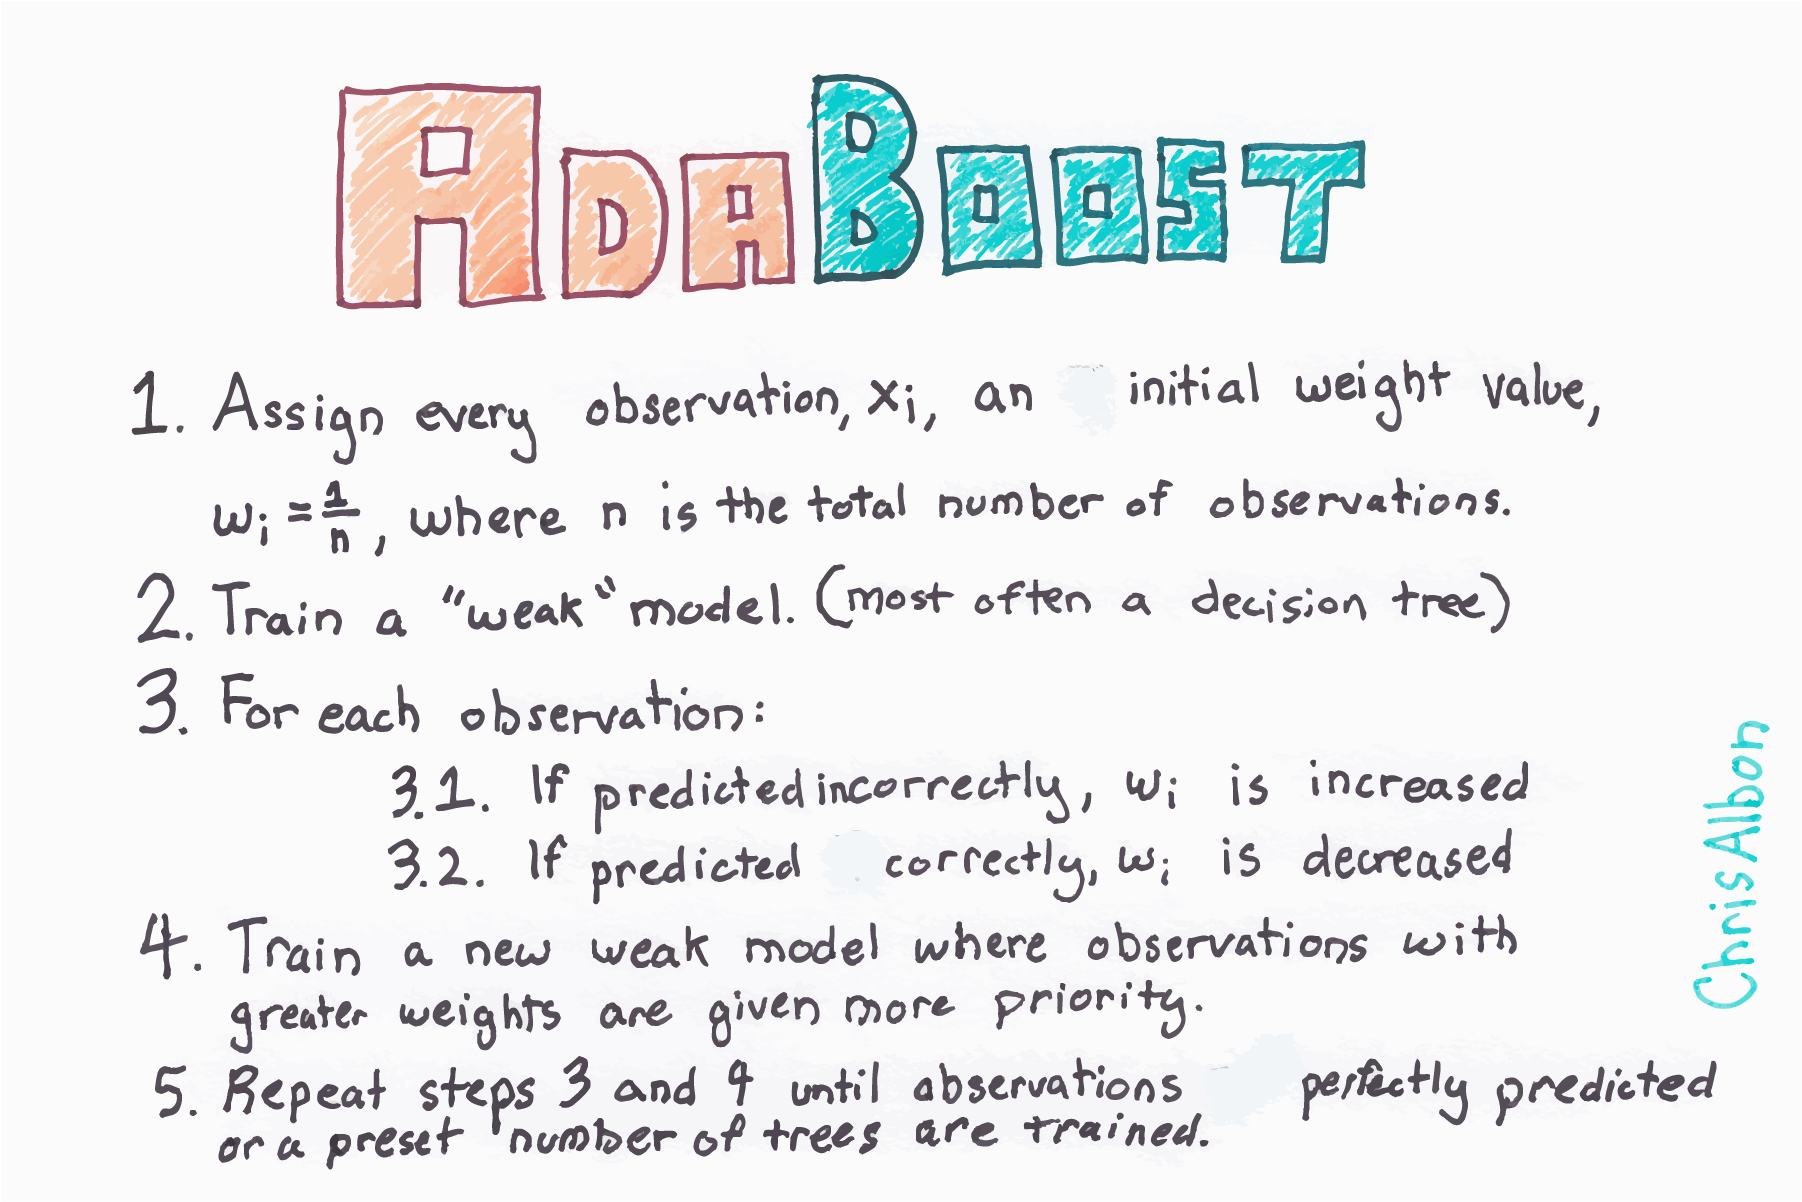

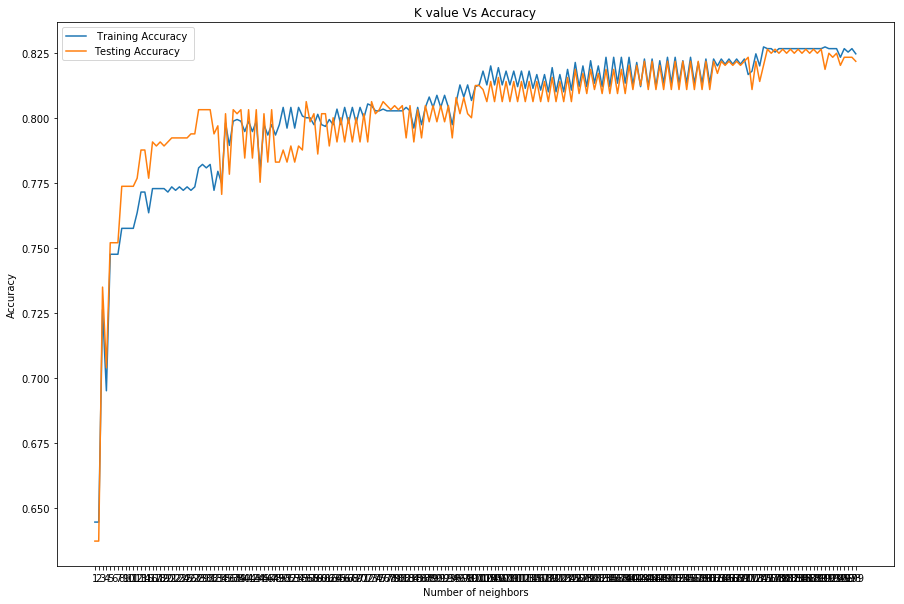

Best accuracy is 0.8263565891472868 with K = 176


In [17]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

train_accuracy=[]
test_accuracy= []

for k in range(1,200):
    #n_estimators is the number of models to iteratively train
    bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=k)
    bdt.fit(x_train.values, y_train.values)
    test_accuracy.append(bdt.score(x_test.values, y_test.values))
    train_accuracy.append(bdt.score(x_train, y_train))


plt.figure(figsize= [15,10])
plt.plot(range(1,200), train_accuracy, label= " Training Accuracy ")
plt.plot(range(1,200), test_accuracy, label= "Testing Accuracy")
plt.legend()
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.title("K value Vs Accuracy")
plt.xticks(range(1,200))
plt.show()

print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

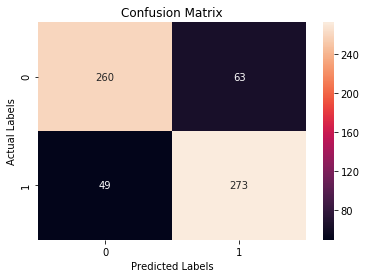

Classification Report : 
              precision    recall  f1-score   support

          0       0.84      0.80      0.82       323
          1       0.81      0.85      0.83       322

avg / total       0.83      0.83      0.83       645



In [18]:
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=176)
y_pred= bdt.fit(x_train, y_train).predict(x_test)
cm= confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt= "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()
print("Classification Report : \n", classification_report(y_test, y_pred))

## SVM with GridSearch as parameter optimisation is used

Here using grid search best value of parameters is found out. Parameters to optimise is C and Gamma and kernel function is already fixed which is RBF

In [19]:
from sklearn import svm, grid_search
from sklearn.model_selection import GridSearchCV

def svc_param_selection(X, y):
    Cs= [0.001,.01,.1, 1, 10]
    gammas= [.001, .01, .1, 1]
    param_grid= {'C':Cs, 'gamma': gammas}
    grid_search= GridSearchCV(svm.SVC(kernel= 'rbf'), param_grid)
    grid_search.fit(X, y)
    print(grid_search.best_params_)
    return grid_search.best_params_


C:\Users\Sudhanshu\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Sudhanshu\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [20]:
gamma= svc_param_selection(x, y)
print(gamma['C'])

{'C': 1, 'gamma': 0.001}
1


0.970542635659


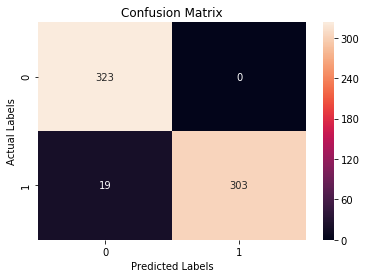

Classification Report : 
              precision    recall  f1-score   support

          0       0.94      1.00      0.97       323
          1       1.00      0.94      0.97       322

avg / total       0.97      0.97      0.97       645



In [21]:
clf= svm.SVC(C=1, gamma= .001)
clf.fit(x_train, y_train)
print(clf.score(x_test, y_test))

y_pred= clf.fit(x_train, y_train).predict(x_test)
cm= confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt= "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()
print("Classification Report : \n", classification_report(y_test, y_pred))

# Finally Random Forest is selected as the Best model

## Going to predict values in test set using random forest with generated parameters

In [22]:
test= pd.read_csv("test.csv")
test.drop("TypeOfSteel_A400", axis=1, inplace=True)
test.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,696,706,762234,762239,26,13,7,3330,120,140,...,0.0074,0.7692,0.7143,0.0,1.4150,1.0000,0.6990,-0.5000,0.0006,0.1569
1,99,129,2634035,2634039,75,30,7,9556,104,149,...,0.0218,1.0000,0.5714,0.0,1.8751,1.4771,0.6021,-0.8667,-0.0046,0.2288
2,297,302,1028213,1028219,16,5,6,1990,120,132,...,0.0037,1.0000,1.0000,1.0,1.2041,0.6990,0.7782,0.1667,-0.0283,0.1400
3,0,225,344016,344225,25473,992,578,3061597,23,148,...,0.1607,0.2268,0.3616,0.0,4.4061,2.3522,2.3201,-0.0711,-0.0610,1.0000
4,1587,1602,211409,211458,323,51,53,33607,88,119,...,0.0089,0.2941,0.9245,1.0,2.5092,1.1761,1.6902,0.6939,-0.1871,0.9471


In [23]:
rf= RandomForestClassifier(random_state= 2, n_estimators= 26, min_samples_split=2)
rf.fit(x, y)
pred= rf.predict(test)
df= pd.DataFrame({"Faults":pred})
df.to_csv("submit.csv", index=False)